# <center>**IRIS FLOWER CLASSIFICATION**</center>

<p style="text-align: center">
    A Project for <b>Afame Technologies</b>
    <br/> 
    By: Sayali Deshpande
</p>

<p style="text-align: center">
    <img src="images/iris_flower_types.png" alt="Iris Flower Species">
</p>

#### Project Summary:
 The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The Use of multiple measurements in Taxonomic Problems.
It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

#### Objective:
The main objective of this exercise is to build a machine learning model that can  accurately classify the Iris flowers into their respective species based on their measurements. he model aims to automate the classification process, offering a practical solution for identifying iris species.

#### Introduction

- Iris flowers have three species: Setosa, Versicolor and Virginica.
- These species are distinguished based on 4 measurements: Sepal Length, Sepal Width, Petal Length and Petal Width in centimeters.

## Import Libraries and Define Auxiliary Functions

Installing the libraries

In [ ]:
!pip install numpy
!pip install pandas
!pip install seaborn

In [197]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
# Gaussian Naive Bayes classification algorithm
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Data Collection

The dataset has been provided in a csv format. It consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica, and Iris versicolor).
<br/>
Find the data set <i><b><a href="iris_flower_dataset.csv"> here </a></b></i>

#### Load the dataframe

In [198]:
df = pd.read_csv("iris_flower_dataset.csv")

In [199]:
# Display top 5 records of dataset
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [200]:
# Check the number of rows and columns (dimension) of dataset
print("Number of (rows, columns) =", df.shape)

Number of (rows, columns) = (150, 5)


In [201]:
# Fetch detailed information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Data Wrangling

- Check for null values

In [202]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

All values are 0. It means that there are no null values over the entire data frame.

- View the statistical description of the dataset.

In [203]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


- Identify which columns are numerical and categorical

In [204]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

- Get all the column names

In [205]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

- Calculate the number of samples for each species

In [206]:
# Apply value_counts() on column Species
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Iris genus of about 300 species of flowering plants, including some of the world’s most popular and varied garden flowers. <br/>
The flowers commonly possess three sepals, three petals, and three broad pollen-receptive stigma branches.

We will discuss iris flower and its three classes: Iris setosa, Iris versicolor, and Iris virginica.

- <b>Iris Setosa</b>: Characterized by its relatively small size, with distinctive characteristics in sepal and petal dimensions.
- <b>Iris Versicolor</b>: Moderate in size, with features falling between those of Iris setosa and Iris virginica.
- <b>Iris Virginica</b>: Generally larger in size, with notable differences in sepal and petal dimensions compared to the other two species.

The separation of the different species is based on the 4 features provided. These features are all measured in centimeters.

<div style="display:flex">
    <div style="width:75%">
    - <b> Sepal Length </b>: The length of the iris flower’s sepals (the green leaf-like structures that encase the flower bud).<br/>
    - <b> Sepal Width </b>: The width of the iris flower’s sepals. <br/>
    - <b> Petal Length </b>: The length of the iris flower’s petals (the colored structures of the flower). <br/>
    - <b> Petal Width </b>: The width of the iris flower’s petals. <br/>
    </div>
    <div style="width:25%;">
        <img src="images/iris_flower.jpg" alt="iris_flower" width="150px">
    </div>
</div>

## Exploratory Data Analysis (EDA) with Visualization

- Data distribution

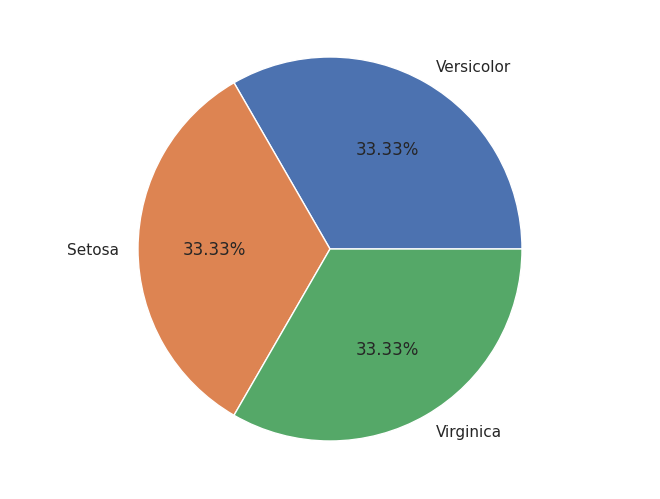

In [207]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

-  Distribution of Numerical Variables

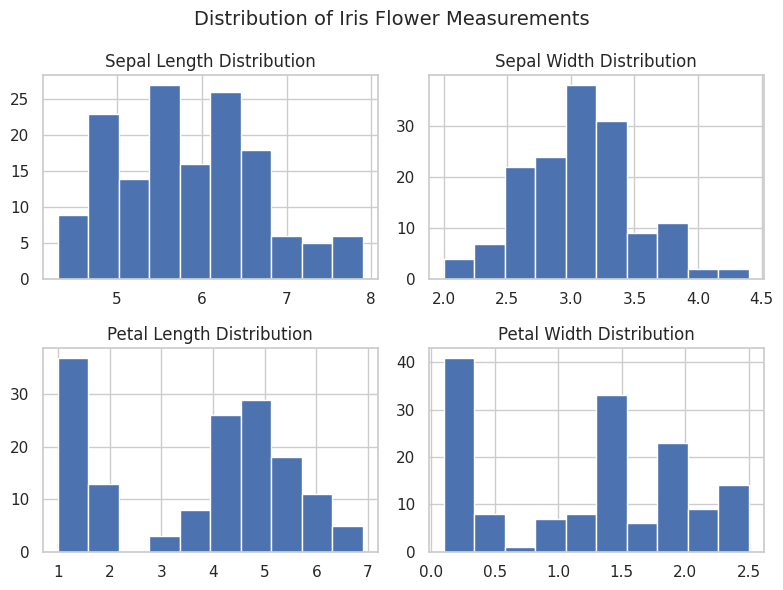

In [208]:
# Histogram visualization code for distribution of numerical variables
# Create a figure with subplots
plt.figure(figsize=(8, 6))
plt.suptitle('Distribution of Iris Flower Measurements', fontsize=14)

# Create a 2x2 grid of subplots
plt.subplot(2, 2, 1)  # Subplot 1 (Top-Left)
plt.hist(df['sepal_length'])
plt.title('Sepal Length Distribution')

plt.subplot(2, 2, 2)  # Subplot 2 (Top-Right)
plt.hist(df['sepal_width'])
plt.title('Sepal Width Distribution')

plt.subplot(2, 2, 3)  # Subplot 3 (Bottom-Left)
plt.hist(df['petal_length'])
plt.title('Petal Length Distribution')

plt.subplot(2, 2, 4)  # Subplot 4 (Bottom-Right)
plt.hist(df['petal_width'])
plt.title('Petal Width Distribution')

# Display the subplots
plt.tight_layout()  # Helps in adjusting the layout
plt.show()

- Petal Length vs Petal Width

In [209]:
# Define colors for each species and the corresponding species labels.
colors = ['red', 'yellow', 'green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

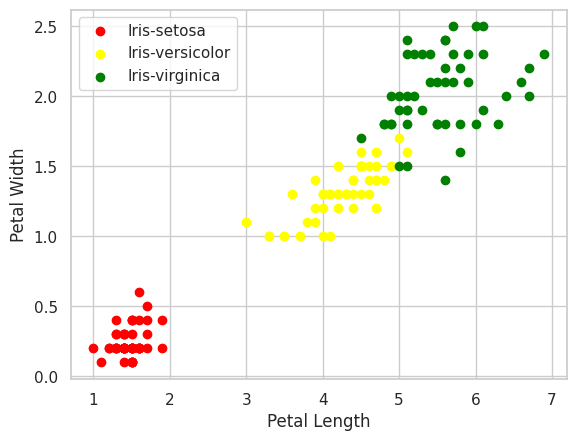

In [210]:
# Scatter plot visualization code for Petal Length vs Petal Width.
# Create a scatter plot for Petal Length vs Petal Width for each species.
for i in range(3):
    # Select data for the current species.
    x = df[df['species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['petal_length'], x['petal_width'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

- Sepal Length vs Sepal Width

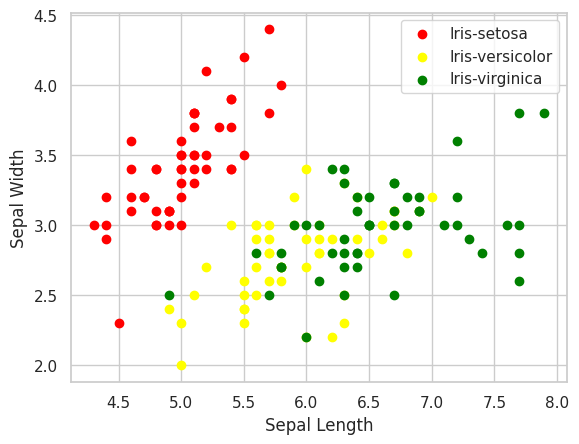

In [211]:
# Scatter plot visualization code for Sepal Length vs Sepal Width.
# Create a scatter plot for Sepal Length vs Sepal Width for each species.
for i in range(3):
    # Select data for the current species.
    x = df[df['species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['sepal_length'], x['sepal_width'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

Define x and y. x contains all the input variables such as independent features, and y should contain the dependent variable which is dependent on independent variables, the output.

In [212]:
x=df.iloc[:,:4]
y=df.iloc[:,4]

In [213]:
print(x)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [214]:
print(y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object


- Split the Data Into Train and Test Datasets

To train the model and next test the model we have to split the entire dataset into train and test sets. In that, the training dataset is used to train the model and the test dataset is to test the model which has been trained with the training dataset.

In [215]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(x,y,random_state=0)

Print shapes of train-test set

In [216]:
print("Shapes:\nX_train =>",X_train.shape," Y_train =>", Y_train.shape)
print("X_test =>",X_test.shape," Y_test =>",Y_test.shape)

Shapes:
X_train => (112, 4)  Y_train => (112,)
X_test => (38, 4)  Y_test => (38,)


The following function is to plot the confusion matrix.

In [217]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    plt.show() 

### Creating Classification Model

#### 1. LogisticRegression

Classify the Iris flowers dataset using logistic regression using LogisticRegression from the sci-kit learn library.

In [218]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}
lr=LogisticRegression()

Train the model using the fit method by passing training datasets: x_train and y_train.

In [219]:
gridsearch_cv_lr = GridSearchCV(lr, parameters, scoring='accuracy', cv=10)
logreg_cv = gridsearch_cv_lr.fit(X_train, Y_train)

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.

In [220]:
print("Tuned hyperparameters LR:(best parameters) ",logreg_cv.best_params_)
print("Accuracy LR :",logreg_cv.best_score_)

Tuned hyperparameters LR:(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy LR : 0.9553030303030303


Calculate the accuracy on the test data using the method <code>score</code>:

In [221]:
lr_score = logreg_cv.score(X_test, Y_test)
lr_score

0.9736842105263158

Lets look at the confusion matrix:

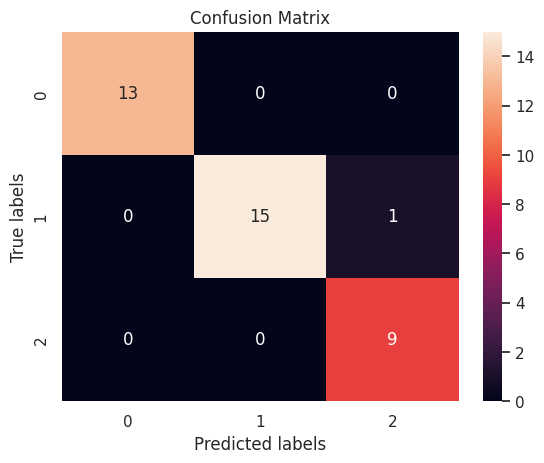

In [222]:
# Confusion Martix for LogisticRegression
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

#### 2. Support Vector Machine (SVM)

In [223]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()
gridsearch_cv_svm = GridSearchCV(svm, parameters, cv=10, scoring='accuracy')
svm_cv = gridsearch_cv_svm.fit(X_train, Y_train)
print("Tuned hyperparameters SVM:(best parameters) ",svm_cv.best_params_)
print("Accuracy SVM:",svm_cv.best_score_)

Tuned hyperparameters SVM:(best parameters)  {'C': 1.0, 'gamma': 0.001, 'kernel': 'linear'}
Accuracy SVM: 0.9818181818181818


Calculate the accuracy score

In [224]:
svm_score =svm_cv.score(X_test, Y_test)
svm_score

0.9736842105263158

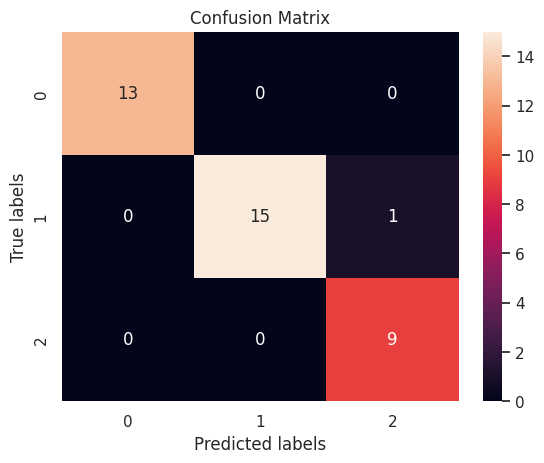

In [225]:
# Confusion Matrix for SVM
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

#### 3. K-Nearest Neighbour (KNN)

In [226]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()
gridsearch_cv_knn = GridSearchCV(KNN, parameters, cv=10, scoring='accuracy')
knn_cv = gridsearch_cv_knn.fit(X_train, Y_train)
print("Tuned hyperparameters KNN:(best parameters) ",knn_cv.best_params_)
print("Accuracy KNN:",knn_cv.best_score_)

Tuned hyperparameters KNN:(best parameters)  {'algorithm': 'brute', 'n_neighbors': 6, 'p': 2}
Accuracy KNN: 0.9727272727272727


Calculate the accuracy score

In [227]:
knn_score= knn_cv.score(X_test, Y_test)
knn_score

0.9736842105263158

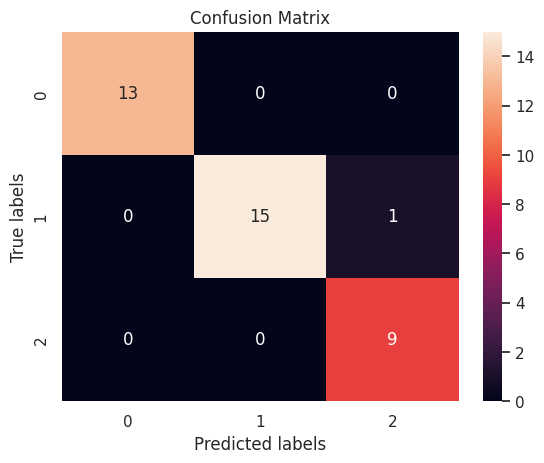

In [228]:
# Confusion Matrix for KNN
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

#### 4. Decision Tree 

In [229]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()
treesearch_cv = GridSearchCV(tree, parameters, cv=10, scoring='accuracy')
tree_cv = treesearch_cv.fit(X_train, Y_train)
print("Tuned hyperparameters Decision Tree:(best parameters) ",tree_cv.best_params_)
print("Accuracy Decision Tree :",tree_cv.best_score_)

Tuned hyperparameters Decision Tree:(best parameters)  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'best'}
Accuracy Decision Tree : 0.9734848484848484


Calculate the accuracy score

In [230]:
tree_score=tree_cv.score(X_test,Y_test)
tree_score

0.9736842105263158

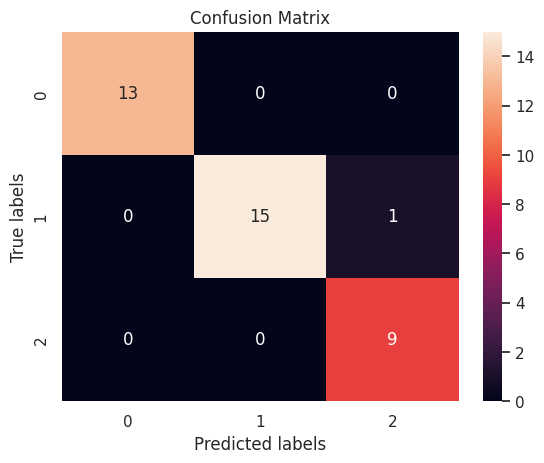

In [231]:
# Confusion Matrix for Decision Tree
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

#### 5. Gaussian Naive Bayes (GaussianNB)

In [232]:
parameters = {'var_smoothing': np.logspace(0,-9, num=100)}

gnb = GaussianNB()
gridsearch_cv_gnb = GridSearchCV(gnb, parameters, cv=10, scoring='accuracy')
gnb_cv = gridsearch_cv_gnb.fit(X_train, Y_train)
print("Tuned hyperparameters GaussianNB:(best parameters) ",tree_cv.best_params_)
print("Accuracy GaussianNB :",tree_cv.best_score_)

Tuned hyperparameters GaussianNB:(best parameters)  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'best'}
Accuracy GaussianNB : 0.9734848484848484


In [233]:
# Calculate the accuracy score
gnb_score=gnb_cv.score(X_test,Y_test)
gnb_score

0.9210526315789473

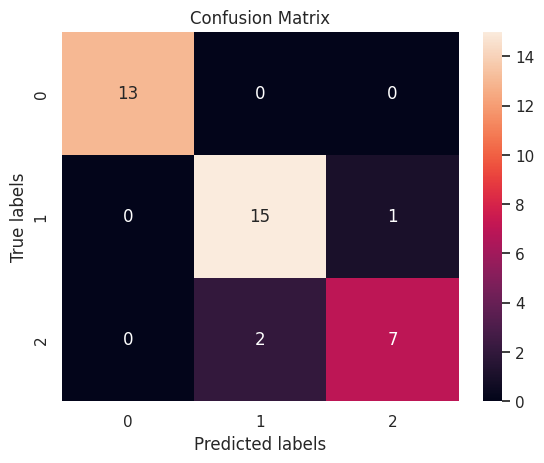

In [234]:
# Confusion Matrix for GaussianNB
yhat=gnb_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

- Printing all the accuracy and best score into a dataframe.

In [235]:
algorithms = ['Logistic Regression', 'Support Vector Machine', 'K Nearest Neighbours', 'Decision Tree', 'Gaussian Naive Bayes ']

scores = [lr_score, svm_score, knn_score, tree_score, gnb_score]

best_scores = [logreg_cv.best_score_, svm_cv.best_score_, knn_cv.best_score_, tree_cv.best_score_, gnb_cv.best_score_]

column_names = ['Algorithm', 'Accuracy Score', 'Best Score']


df = pd.DataFrame(list(zip(algorithms, scores, best_scores)),columns = column_names)
df

,Algorithm,Accuracy Score,Best Score
0,Logistic Regression,0.973684,0.955303
1,Support Vector Machine,0.973684,0.981818
2,K Nearest Neighbours,0.973684,0.972727
3,Decision Tree,0.973684,0.973485
4,Gaussian Naive Bayes,0.921053,0.956061


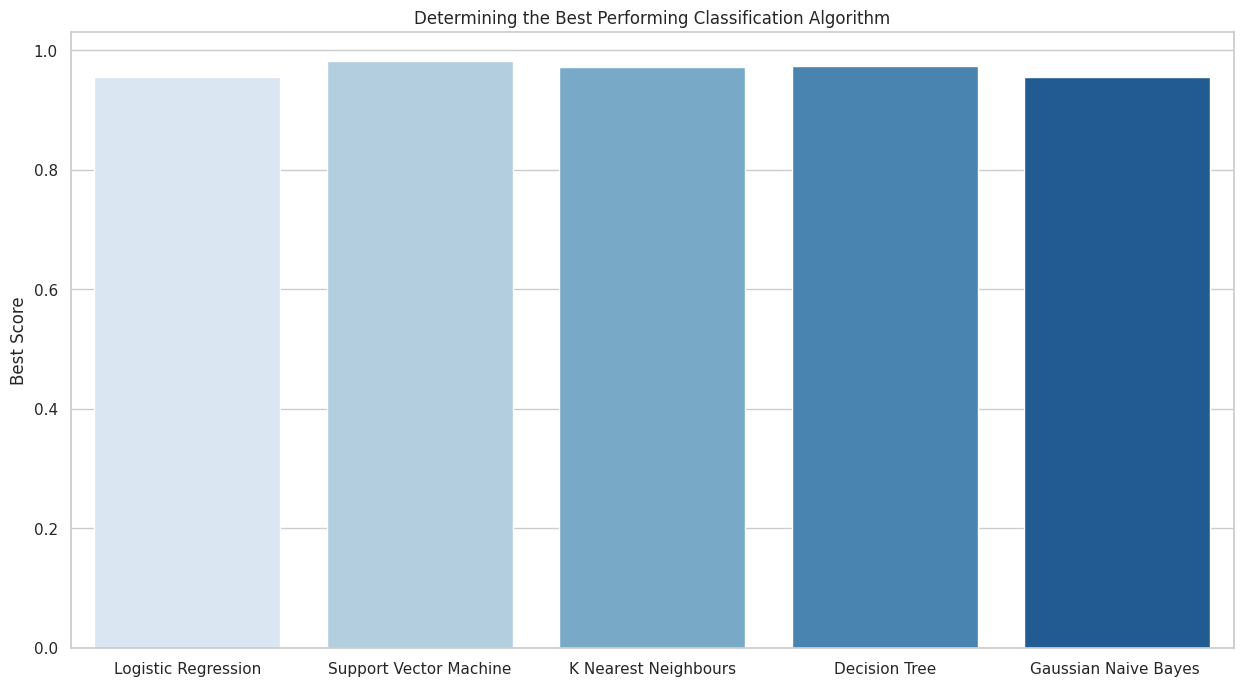

In [236]:
sns.set(style="whitegrid")

plt.figure(figsize=(15,8))
sns.barplot(x=algorithms, y=best_scores, palette="Blues")
plt.title("Determining the Best Performing Classification Algorithm")
plt.ylabel("Best Score")
plt.show()

### Conclusion

The project aimed to classify Iris flowers into three distinct species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica. After extensive data exploration, preprocessing, and model evaluation, the following conclusions can be drawn:

1. **Data Exploration:** Through a thorough examination of the dataset, we gained insights into the characteristics and distributions of features. We found that Iris-Setosa exhibited distinct features compared to the other two species.

2. **Data Preprocessing:** Data preprocessing steps, including handling missing values and encoding categorical variables, were performed to prepare the dataset for modeling.

3. **Model Selection:** After experimenting with various machine learning models, tuned Support Vector Machine was chosen as the final model due to its simplicity, interpretability, and good performance in classifying Iris species.

4. **Model Training and Evaluation:** Total 5 machine learning models were trained on the training dataset and evaluated using appropriate metrics. The Support Vector Machine model demonstrated satisfactory accuracy and precision in classifying Iris species.

5. **Challenges and Future Work:** The project encountered challenges related to feature engineering and model fine-tuning. Future work may involve exploring more advanced modeling techniques to improve classification accuracy further.

We got an accuracy of 97.37% with Support Vector Machine model, which shows that the model we built is very accurate.